In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
covid_df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Omicron%20daily%20cases%20by%20country%20(COVID-19%20variant)/covid-variants.csv")
covid_df.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [5]:
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df = covid_df[['location','date','variant','num_sequences_total']]

In [6]:
omicron_df = covid_df[covid_df.variant == 'Omicron']
omicron_df = omicron_df[['location','date','num_sequences_total']]
omicron_df.head()

,location,date,num_sequences_total
19,Angola,2020-07-06,3
43,Angola,2020-08-31,1
67,Angola,2020-09-28,10
91,Angola,2020-10-12,29
115,Angola,2020-10-26,7


<AxesSubplot:xlabel='date', ylabel='num_sequences_total'>

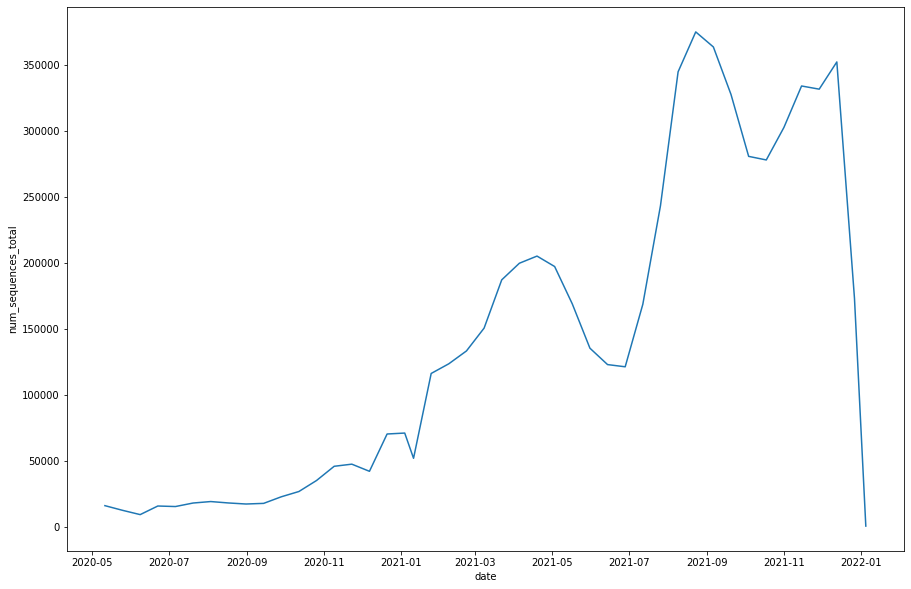

In [7]:
time_series_df = omicron_df.groupby(['date']).sum()
time_series_df.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data = time_series_df, x= time_series_df.date,y= time_series_df.num_sequences_total, ax=ax)

In [8]:
import datetime as dt
time_series_df[time_series_df.date.dt.year == 2022]

,date,num_sequences_total
44,2022-01-05,979


<AxesSubplot:xlabel='date', ylabel='num_sequences_total'>

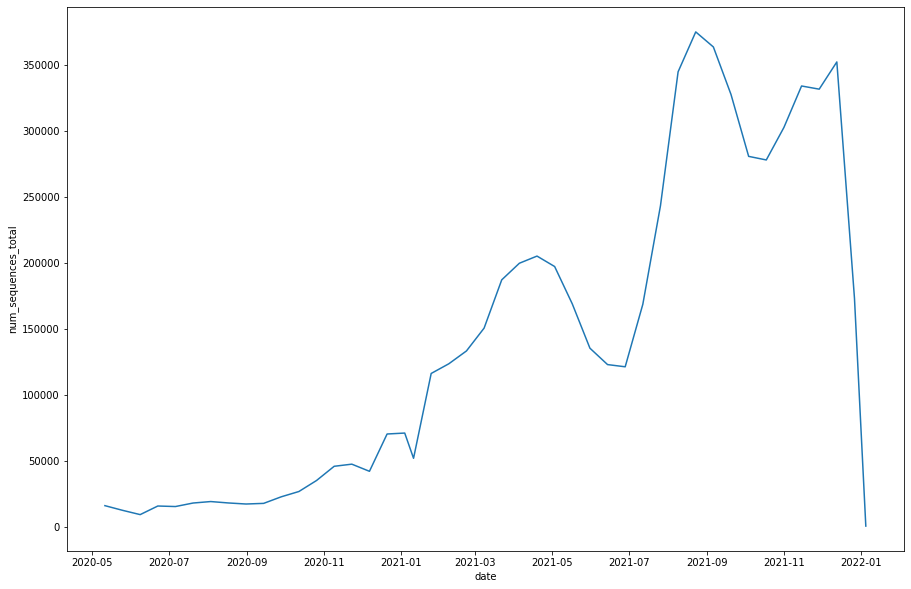

In [9]:
time_series_df = omicron_df[omicron_df.date.dt.year != 2022]
time_series_df = omicron_df.groupby(['date']).sum()
time_series_df.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data = time_series_df, x= time_series_df.date,y= time_series_df.num_sequences_total, ax=ax)